In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.axes as axs

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_csv = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_csv = pd.read_csv(clinical_trial_data_to_load)

#mouse_drug_csv.head()
#clinical_trial_csv.head()
# Combine the data into a single dataset
combined_dataset = pd.merge(mouse_drug_csv,clinical_trial_csv,how='inner',left_on='Mouse ID',right_on='Mouse ID')

# Display the data table for preview
combined_dataset.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_timepoint_grouped = combined_dataset.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']

# Convert to DataFrame
drug_timepoint = drug_timepoint_grouped.mean()
drug_timepoint_mean_df = pd.DataFrame(drug_timepoint)

# Preview DataFrame
drug_timepoint_mean_df.reset_index(inplace=True)

drug_timepoint_mean_df.head()
#drug_timepoint_df.columns
#drug_timepoint

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_of_tumor_volumes = drug_timepoint_grouped.sem()
#sem_of_tumor_volumes = drug_timepoint_df.sem()

# Convert to DataFrame
sem_of_tumor_volumes_df = pd.DataFrame(sem_of_tumor_volumes)

# Preview DataFrame
sem_of_tumor_volumes_df.reset_index(inplace=True)
sem_of_tumor_volumes_df.head()
#sem_of_tumor_volumes_df.columns
#sem_of_tumor_volumes

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
pivoted_df = drug_timepoint_mean_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)') 

# Preview that Reformatting worked
pivoted_df.head()
#pivoted_df.columns

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
#for column in pivoted_df:
    #print(pivoted_sem_df[column])
    
# Minor Data Munging to Re-Format the Data Frames of sem
pivoted_sem_df = sem_of_tumor_volumes_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)') 

# Preview that Reformatting worked
pivoted_sem_df.head()
#pivoted_df.columns

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


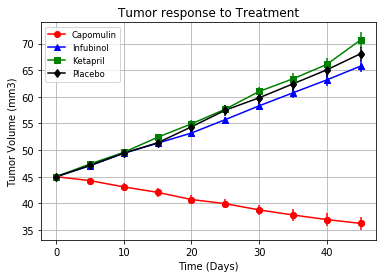

In [6]:
# Generate the Plot (with Error Bars)
x_axis = pivoted_df.index.values
y_capomulin = pivoted_df['Capomulin']
y_infubinol = pivoted_df['Infubinol']
y_ketapril = pivoted_df['Ketapril']
y_placebo = pivoted_df['Placebo']


#x_err = 0.2
y_err_capomulin = pivoted_sem_df['Capomulin']
y_err_infubinol = pivoted_sem_df['Infubinol']
y_err_ketapril = pivoted_sem_df['Ketapril']
y_err_placebo = pivoted_sem_df['Placebo']

fig, ax = plt.subplots()

ax.errorbar(x_axis,y_capomulin,yerr=y_err_capomulin,fmt='o',color='red')
Capomulin, = plt.plot(x_axis, y_capomulin, color="red", label='Capomulin',marker='o')

ax.errorbar(x_axis,y_infubinol,yerr=y_err_infubinol,fmt='^',color='blue')
Infubinol, = plt.plot(x_axis, y_infubinol, color="blue", label='Infubinol',marker='^')

ax.errorbar(x_axis,y_ketapril,yerr=y_err_ketapril,fmt='s',color='green')
Ketapril, = plt.plot(x_axis, y_ketapril, color="green", label='Ketapril',marker='s')

ax.errorbar(x_axis,y_placebo,yerr=y_err_placebo,fmt='d',color='black')
Placebo, = plt.plot(x_axis, y_placebo, color="black", label='Placebo',marker='d')


ax.set_xlabel('Time (Days)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Tumor response to Treatment')


plt.grid()
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo],loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Images/Tumor Response Graph.png")
plt.show()


In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_grouped = combined_dataset.groupby(['Drug','Timepoint'])['Metastatic Sites']
metastatic_mean = metastatic_grouped.mean()

# Convert to DataFrame
metastatic_mean_df = pd.DataFrame(metastatic_mean)

# Preview DataFrame
#metastatic_mean_df.reset_index(inplace=True)
metastatic_mean_df.head()
#combined_dataset.columns
#metastatic_mean_df.reset_index(inplace=True)
#metastatic_mean_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_metastatic_sites = metastatic_grouped.sem()

# Convert to DataFrame
sem_metastatic_sites_df = pd.DataFrame(sem_metastatic_sites)

# Preview DataFrame
#sem_metastatic_sites_df.reset_index(inplace=True)
sem_metastatic_sites_df.head()
#sem_metastatic_sites_df.columns

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
#metastatic_mean_df.index.levels[1]
metastatic_mean_df.reset_index(inplace=True)
#metastatic_mean_df.head()

In [11]:
# Minor Data Munging to Re-Format the Data Frames
pivoted_metastatic = metastatic_mean_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites') 

# Preview that Reformatting worked
pivoted_metastatic.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
sem_metastatic_sites_df.reset_index(inplace=True)
#sem_metastatic_sites_df.head()


In [13]:
# Minor Data Munging to Re-Format the Data Frames for sem
pivoted_metastatic_sem = sem_metastatic_sites_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites') 

# Preview that Reformatting worked
pivoted_metastatic_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


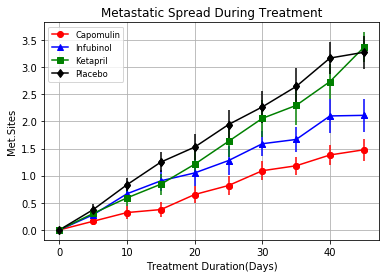

In [14]:
# Generate the Plot (with Error Bars)
x_axis = pivoted_metastatic.index.values
y_capomulin = pivoted_metastatic['Capomulin']
y_infubinol = pivoted_metastatic['Infubinol']
y_ketapril = pivoted_metastatic['Ketapril']
y_placebo = pivoted_metastatic['Placebo']


#x_err = 0.2
y_err_capomulin = pivoted_metastatic_sem['Capomulin']
y_err_infubinol = pivoted_metastatic_sem['Infubinol']
y_err_ketapril = pivoted_metastatic_sem['Ketapril']
y_err_placebo = pivoted_metastatic_sem['Placebo']

fig, ax = plt.subplots()

ax.errorbar(x_axis,y_capomulin,yerr=y_err_capomulin,fmt='o',color='red')
Capomulin, = plt.plot(x_axis, y_capomulin, color="red", label='Capomulin',marker='o')

ax.errorbar(x_axis,y_infubinol,yerr=y_err_infubinol,fmt='^',color='blue')
Infubinol, = plt.plot(x_axis, y_infubinol, color="blue", label='Infubinol',marker='^')

ax.errorbar(x_axis,y_ketapril,yerr=y_err_ketapril,fmt='s',color='green')
Ketapril, = plt.plot(x_axis, y_ketapril, color="green", label='Ketapril',marker='s')

ax.errorbar(x_axis,y_placebo,yerr=y_err_placebo,fmt='d',color='black')
Placebo, = plt.plot(x_axis, y_placebo, color="black", label='Placebo',marker='d')


ax.set_xlabel('Treatment Duration(Days)')
ax.set_ylabel('Met.Sites')
ax.set_title('Metastatic Spread During Treatment')


plt.grid()
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo],loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Images/Metastatic Response Graph.png")

# Show the Figure
plt.show()

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rates_grouped = combined_dataset.groupby(['Drug','Timepoint'])['Mouse ID']
survival_rates_count = survival_rates_grouped.count()

# Convert to DataFrame
survival_rates_count_df = pd.DataFrame(survival_rates_count)

# Preview DataFrame
survival_rates_count_df.rename(columns={"Mouse ID":"Mouse Count"})
survival_rates_count_df.reset_index(inplace=True)
survival_rates_count_df.head()
#survival_rates_count_df.columns
#survival_rates_count_df.head(50)
#survival_rates_count_df.tail(50)

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
#Calculating survival percentage
total_count = 0
suvival_per_values = []
#sem_survival_rates = survival_rates_count_df
for i in range(survival_rates_count_df.shape[0]):
    if survival_rates_count_df.iloc[i,1] == 0:
        total_count = survival_rates_count_df.iloc[i,2]
        #print(f"{survival_rates_count_df.iloc[i,0]} ......  {survival_rates_count_df.iloc[i,2]}")
    survival_percentage = ((survival_rates_count_df.iloc[i,2])/total_count)*100
    suvival_per_values.append(survival_percentage)
    
survival_rates_percentage_df = survival_rates_count_df.copy()
survival_rates_percentage_df['Survival Percentage'] = suvival_per_values
survival_rates_percentage_df['Survival Percentage'] = survival_rates_percentage_df['Survival Percentage'].map("{:.0f}".format)
#survival_rates_percentage_df.rename(columns={'Mouse ID':'Mouse Count'})
survival_rates_percentage_df.head()

,Drug,Timepoint,Mouse ID,Survival Percentage
0,Capomulin,0,25,100
1,Capomulin,5,25,100
2,Capomulin,10,25,100
3,Capomulin,15,24,96
4,Capomulin,20,23,92


# Minor Data Munging to Re-Format the Data Frames
pivoted_survival_rates = survival_rates_count_df.pivot(index='Timepoint',columns='Drug',values='Mouse ID') 

# Preview the Data Frame
pivoted_survival_rates.head()

In [17]:
#Minor Data Munging to Re-Format the Data Frames on survival values
pivoted_survival_percentage = survival_rates_percentage_df.pivot(index='Timepoint',columns='Drug',values='Survival Percentage') 

# Preview the Data Frame
pivoted_survival_percentage.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100,100,100,100,100,100,100,100,100,100
5,100,84,100,92,92,96,96,100,96,96
10,100,80,84,88,84,96,88,96,88,88
15,96,76,84,76,84,80,65,96,88,84
20,92,72,80,76,80,76,65,92,81,68


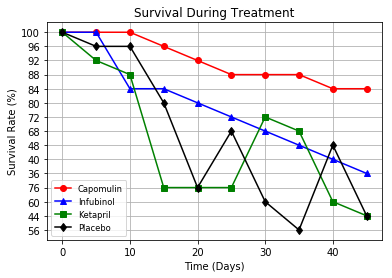

In [18]:
# Generate the Plot (Accounting for percentages)
x_axis = pivoted_survival_percentage.index.values
y_capomulin = pivoted_survival_percentage['Capomulin']
y_infubinol = pivoted_survival_percentage['Infubinol']
y_ketapril = pivoted_survival_percentage['Ketapril']
y_placebo = pivoted_survival_percentage['Placebo']

#y_ticks = [0,40,50,60,70,80,90,100]
fig, ax = plt.subplots()

#ax.set_ylim(0,10)
#ax.axis('tight')
Capomulin, = plt.plot(x_axis, y_capomulin,color="red", label='Capomulin',marker='o')

Infubinol, = plt.plot(x_axis,y_infubinol, color="blue", label='Infubinol',marker='^')

Ketapril, = plt.plot(x_axis,y_ketapril, color="green", label='Ketapril',marker='s')

#ax.errorbar(x_axis,y_placebo,fmt='d',color='black')
Placebo, = plt.plot(x_axis,y_placebo, color="black", label='Placebo',marker='d')

#plt.plot(x_axis, y_capomulin,'or',x_axis,y_infubinol,'b^',x_axis,y_ketapril,'g')#x_axis,y_placebo,'bd')


#ax.set_ylim(10,30)
#ax.set_ybound(lower=0, upper=100)
#ax.axis(0,40,100,0)
#ax.set_ylim(0,5)
#ax.invert_yaxis
#plt.gca().invert_yaxis()
#plt.ylim(plt.ylim()[::-1])
#plt.ylim(top=10)

plt.gca().invert_yaxis()

ax.set_xlabel('Time (Days)')
ax.set_ylabel('Survival Rate (%)')
ax.set_title('Survival During Treatment')

#plt.ylim(0,100)
plt.grid()
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo],loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Images/Survival Rate Graph.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug
#percentage_change_drug = pivoted_df.
lenofindex = len(pivoted_df.columns)
percentage_change_drug = []
drug_name = []
#percentage_drug_vals = []
for col in range(lenofindex):
    for row in range(pivoted_df.shape[0]):
        if row == 0:
            startval = pivoted_df.iloc[row,col]
        if row == (lenofindex - 1):
            endval = pivoted_df.iloc[row,col]
    percentage_change_drug.append((endval - startval)/startval * 100)
    drug_name.append(pivoted_df.columns[col])
    
percentage_drug_df = pd.DataFrame({"percentage":percentage_change_drug,"Drug":drug_name})
percentage_drug_df.set_index("Drug",inplace=True)

# Display the data to confirm
percentage_drug_df
#print(type(percentage_change_drug))

,percentage
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


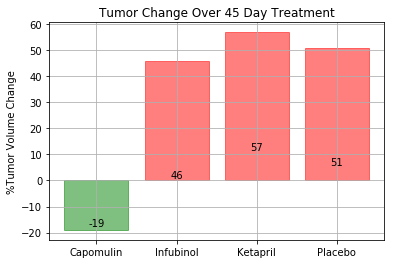

In [40]:
# Store all Relevant Percent Changes into a Tuple
percent_change_tuple = tuple(percentage_change_drug)

#print(percent_change_tuple)

# Splice the data between passing and failing drugs
passing_drugs = []
failing_drugs = []

for val in percent_change_tuple:
    #print(val)
    if val < 0:
        passing_drugs.append(val)
    else:
        failing_drugs.append(val)

#print(failing_drugs)
# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()

drugs = [] 
xticksval = ['Capomulin','Infubinol','Ketapril','Placebo']
#my_colors = 'grrr'


for drug in percentage_drug_df.index.values:
    if (drug == 'Capomulin'or drug == 'Infubinol'or drug == 'Ketapril'or drug == 'Placebo' ):
        drugs.append(int(percentage_drug_df.loc[drug]))
        
x_axis = np.arange(len(drugs)) 
#x_axis = [i for i, _ in enumerate(xticksval)]

#rects1 = ax.bar(x_axis, drugs,alpha=0.5, align="center") ---works correct
rects1 = ax.bar(x_axis, drugs,alpha=0.5, align="center") 

#ax.set_ylim(-20,60)
plt.xticks(x_axis, xticksval)
plt.ylabel('%Tumor Volume Change')
plt.title('Tumor Change Over 45 Day Treatment')


# Use functions to label the percentages of changes
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
   
    for rect in rects:
        height = rect.get_height()
        
        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)
        
        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
       # if p_height > 0.95: # arbitrary; 95% looked good to me.
        if p_height > 0:        
            label_position = height - (y_height * 0.55)
            plt.setp(rect,color='r')
        else:
            label_position = height + (y_height * 0.01)
            plt.setp(rect,color='g')
        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')



# Call functions to implement the function calls
autolabel(rects1, ax)

# Save the Figure
plt.grid()

# Show the Figure
fig.show()
#x_axis

Three points unable to get output correctly:
1) Summary graph, y axis values not changing
2) 